In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
import torchvision.datasets as dset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR
import models
from utils import progress_bar


def show_images(imgs):
    NUM = imgs.shape[0]

    sqrtn = int(np.ceil(np.sqrt(NUM)))
    sqrtimg = int(np.ceil(np.sqrt(NUM)))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(imgs):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img)
    return


#MNIST_DATA = fetch_mldata('MNIST original')

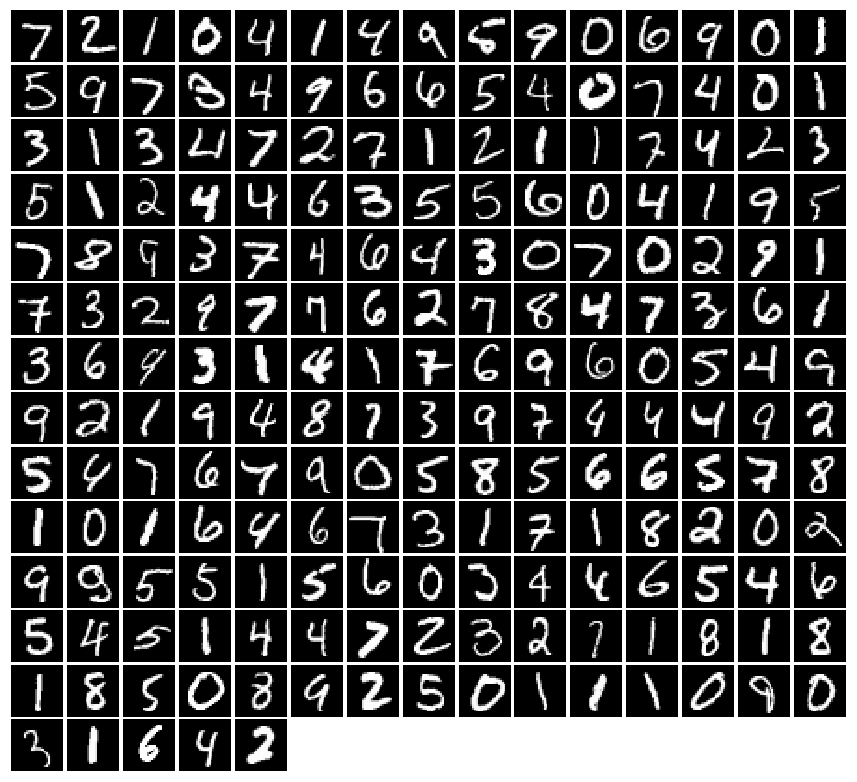

In [3]:
MNIST = dset.MNIST('../datasets/', train=False, download=True,transform=T.ToTensor())

BATCH_SIZE = 20 
train_loader = DataLoader(MNIST, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(MNIST, batch_size=200, shuffle=False)

imgs = train_loader.__iter__().next()[0].numpy().squeeze()
imgs = test_loader.__iter__().next()[0].numpy().squeeze()
show_images(imgs)

In [4]:
MNIST.test_data.numpy().reshape(10000,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
dtype = torch.FloatTensor
use_cuda =torch.cuda.is_available()
if use_cuda ==True:torch.cuda.FloatTensor

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data

In [6]:
torch.cuda.is_available()

False

In [ ]:
net = models.MLP(input_dim=28*28, output_dim = 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001, nesterov= True)
# optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001, nesterov= True)
#optimizer = optim.Adam(net.parameters(), lr=0.005, weight_decay=0.002)
#scheduler = MultiStepLR(optimizer, [100, 150,200], gamma=0.1)
scheduler = MultiStepLR(optimizer, [5, 10], gamma=0.1)
# scheduler = ExponentialLR(optimizer,gamma=0.95)
# scheduler = ReduceLROnPlateau(optimizer, 'max', patience =3,min_lr= 0.00001)
#5e-3 86
if use_cuda:
    criterion.cuda()
    net.cuda()
#     resnet101 = torch.nn.DataParallel(resnet101, device_ids=range(torch.cuda.device_count()))
#     cudnn.benchmark = True   
hist= train(epoch=150,early_stopping= 20)

In [ ]:
def layer_info():


In [11]:
k=train_loader.__iter__().next()[0]

In [16]:
k.size()
#k =k.view(20,28*28)


torch.Size([20, 784])

In [7]:
#torch.save(net.state_dict(), 'resnet50_ang_loss.pth')
net = models.MLP(input_dim=28*28, output_dim = 10)
net.load_state_dict(torch.load('MLP.pth'))

In [8]:
ori_x= []
layer1=[]
layer2=[]
layer3=[]
true_label = []

for j,(batch_x, batch_y) in enumerate(test_loader):
    x = Variable(batch_x.view(200, 28*28))
    y = Variable(batch_y)
    x1,x2,x3 = net(x)
    
    ori_x.append(x.data.view(200,28*28).numpy())
    layer1.append(x1.data.view(200,1600).numpy())
    layer2.append(x2.data.view(200,1600).numpy())
    layer3.append(x3.data.view(200,10).numpy())
    true_label.append(y.data.numpy())
    
    
ori_x= np.concatenate(ori_x)
layer1=np.concatenate(layer1)
layer2=np.concatenate(layer2)
layer3=np.concatenate(layer3)
true_label =np.concatenate(true_label)

In [9]:
np.concatenate(layer1).shape
#np.concatenate(true_label).shape
#true_label

ntry =2e5
dis = np.zeros((int(ntry)))
print(dis.shape)
count =0
while(count != ntry):
    a = np.random.randint(0,1e4-1)
    b = np.random.randint(0,1e4-1)
    if(a!=b):
        dis[count] = np.linalg.norm(ori_x[a] -ori_x[b])**2
        count+=1
#     if count %1e4==0:
#         print('qwe')
SIGMA =np.median(dis)
#SIGMA = 104.94901171133142

(200000,)


In [11]:
SIGMA

104.98635551637062

In [7]:
projected_data = models.KPCA(layer1,n_components=10,sigma=50)

from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(projected_data, true_label)

#logistic

NameError: name 'layer1' is not defined

In [5]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
layer1_kpca = kpca.fit_transform(layer1)
#X_back = kpca.inverse_transform(X_kpca)

NameError: name 'layer1' is not defined

In [6]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA, KernelPCA
kf = KFold(n_splits=2)
e_r = 0
for train_index, test_index in kf.split(layer1_kpca):
    logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logistic.fit(layer1_kpca[train_index], true_label[train_index])
    e_r += (1-np.mean(logistic.predict(layer1_kpca[test_index]) == true_label[test_index]))
e_r /=2

NameError: name 'layer1_kpca' is not defined

In [53]:
e_r

0.10559999999999997

In [35]:
layer1_kpca

array([[ 0.1703864 ,  0.19125284, -0.2681368 , ..., -0.11269384,
        -0.07548165,  0.07155173],
       [-0.13684443, -0.32508582,  0.06785168, ..., -0.03475527,
         0.00893053,  0.02077881],
       [-0.43725628,  0.07478812,  0.15709087, ...,  0.06936782,
        -0.14350845, -0.07961196],
       ..., 
       [ 0.0431509 ,  0.32590652,  0.07741888, ...,  0.05287905,
        -0.00367628,  0.13359439],
       [-0.14154483,  0.00617853,  0.03250463, ...,  0.06800474,
         0.00607199,  0.25356853],
       [ 0.2247216 , -0.18506573,  0.44008538, ..., -0.13450828,
         0.15872467,  0.09867068]], dtype=float32)

In [43]:
#np.sum(logistic.predict(projected_data) == true_label)
np.sum(logistic.predict(layer1_kpca) == true_label)

9251

In [37]:
logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
#logistic.fit(projected_data, true_label)
logistic.fit(layer1_kpca, true_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logistic.predict_proba(projected_data)

array([[ 0.03938716,  0.03937476,  0.16048549, ...,  0.08745416,
         0.18584233,  0.16090529],
       [ 0.040831  ,  0.03755474,  0.16451546, ...,  0.0861518 ,
         0.18397657,  0.15766578],
       [ 0.04066402,  0.03697944,  0.15846964, ...,  0.08988064,
         0.17998505,  0.16266007],
       ..., 
       [ 0.03849706,  0.03848451,  0.16102316, ...,  0.09218855,
         0.17929135,  0.16397863],
       [ 0.04075299,  0.03849195,  0.16524703, ...,  0.09230444,
         0.17715135,  0.16316943],
       [ 0.03933689,  0.03799704,  0.16344291, ...,  0.0886913 ,
         0.18433885,  0.15936702]])

In [41]:
logistic.predict(layer1_kpca)

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
logistic.predict_proba(projected_data)[0]

array([ 0.09818019,  0.11288966,  0.10289311,  0.10089946,  0.09807107,
        0.08921688,  0.09535249,  0.10423888,  0.09704235,  0.10121591])

In [15]:
logistic.predict_proba(projected_data)[0]

array([ 0.09818017,  0.1128898 ,  0.10289317,  0.10089949,  0.09807111,
        0.08921688,  0.09535259,  0.10423852,  0.09704243,  0.10121584])

10000

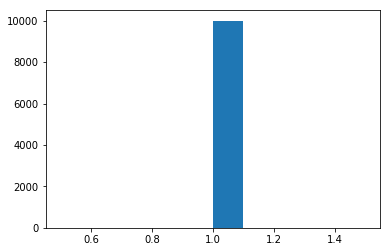

In [31]:
#plt.hist(logistic.predict_proba(projected_data))

plt.hist(logistic.predict(projected_data))

np.sum(logistic.predict(projected_data))

In [8]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA, KernelPCA
from sklearn import linear_model

error_rate = {}


#row is layer and col is lr
lr_error_rate_upper = np.zeros((4,4))
lr_error_rate_lower = np.zeros((4,4))

for num, lr in enumerate([0.002,0.008,0.016,0.064]):
    net = models.MLP(input_dim=28*28, output_dim = 10)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=0.0001, nesterov= True)
    scheduler = MultiStepLR(optimizer,[100],gamma=0.1)
    if use_cuda:
        criterion.cuda()
        net.cuda()
    hist= train(epoch=150,early_stopping= 20)
    ori_x= []
    layer1=[]
    layer2=[]
    layer3=[]
    true_label = []
    
    for j,(batch_x, batch_y) in enumerate(test_loader):
        x = Variable(batch_x.view(200, 28*28))
        y = Variable(batch_y)
        x1,x2,x3 = net(x)

        ori_x.append(x.data.view(200,28*28).numpy())
        layer1.append(x1.data.view(200,1600).numpy())
        layer2.append(x2.data.view(200,1600).numpy())
        layer3.append(x3.data.view(200,10).numpy())
        true_label.append(y.data.numpy())


    ori_x= np.concatenate(ori_x)
    layer= {}
    
    layer['layer1']=np.concatenate(layer1)
    layer['layer2']=np.concatenate(layer2)
    layer['layer3']=np.concatenate(layer3)
    true_label =np.concatenate(true_label)
    
    #projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
    cout = 1
    for lay in ['layer1','layer2','layer3']:        
        kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
        train_data = layer[lay]
        
        layer_kpca = kpca.fit_transform(train_data)
        logistic = linear_model.LogisticRegression()    
        logistic.fit(layer_kpca, true_label)
        error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
        print('Error rate lower bound is ', error_rat)
        lr_error_rate_lower[num, cout] = error_rat
        
        #then compute upper bound
        kf = KFold(n_splits=2,random_state=1209)
        e_r = 0
        for train_index, test_index in kf.split(layer_kpca):
            logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
            logistic.fit(layer_kpca[train_index], true_label[train_index])
            e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
        e_r /=2
        lr_error_rate_upper[num, cout] = e_r
        print('Error rate upper bound is ', e_r)
        cout+=1
        

    print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 7s8ms|Loss: 1.308 | Acc: 71.230% (7123/10000)

This is epoch:2
[========= 500/500 ======>]Step: 0ms| Tot: 7s7ms|Loss: 0.416 | Acc: 88.450% (8845/10000)

This is epoch:3
[========= 500/500 ======>]Step: 0ms| Tot: 7s3ms|Loss: 0.319 | Acc: 90.840% (9084/10000)

This is epoch:4
[========= 500/500 ======>]Step: 0ms| Tot: 7s3ms|Loss: 0.273 | Acc: 92.180% (9218/10000)

This is epoch:5
[========= 500/500 ======>]Step: 0ms| Tot: 7s3ms|Loss: 0.239 | Acc: 93.130% (9313/10000)

This is epoch:6
[========= 500/500 ======>]Step: 0ms| Tot: 7s3ms|Loss: 0.213 | Acc: 93.860% (9386/10000)

This is epoch:7
[========= 500/500 ======>]Step: 0ms| Tot: 7s3ms|Loss: 0.191 | Acc: 94.330% (9433/10000)

This is epoch:8
[========= 500/500 ======>]Step: 0ms| Tot: 7s7ms|Loss: 0.168 | Acc: 95.120% (9512/10000)

This is epoch:9
[========= 500/500 ======>]Step: 0ms| Tot: 7s6ms|Loss: 0.153 | Acc: 95.680% (9568/10000)

This is epoch:10
[========= 500/500 ======>]S

In [10]:
kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
train_data = ori_x

layer_kpca = kpca.fit_transform(train_data)
logistic = linear_model.LogisticRegression()    
logistic.fit(layer_kpca, true_label)
error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
print('Error rate lower bound is ', error_rat)
lr_error_rate_lower[0, 0] =lr_error_rate_lower[1, 0]=lr_error_rate_lower[2, 0]=lr_error_rate_lower[3, 0]= error_rat

#then compute upper bound
kf = KFold(n_splits=2,random_state=1209)
e_r = 0
for train_index, test_index in kf.split(layer_kpca):
    logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logistic.fit(layer_kpca[train_index], true_label[train_index])
    e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
e_r /=2
lr_error_rate_upper[0, 0] =lr_error_rate_upper[1, 0] =lr_error_rate_upper[2, 0] =lr_error_rate_upper[3, 0] = e_r
print('Error rate upper bound is ', e_r)
cout+=1

Error rate lower bound is  0.2246
Error rate upper bound is  0.2552


In [22]:
import pickle

first_exp = {}

first_exp['lr_low']= lr_error_rate_lower
first_exp['lr_up']=lr_error_rate_upper
first_exp['wd_low']= wd_error_rate_lower
first_exp['wd_up']=wd_error_rate_upper
first_exp['iter_low']= iteration_error_rate_lower
first_exp['iter_up'] = iteration_error_rate_upper
first_exp['hu_low'] = hu_error_rate_lower
first_exp['hu_up'] = hu_error_rate_upper



with open('first_exp.pkl','wb') as f:
    pickle.dump(first_exp, f)

In [6]:
#load data

import pickle


with open('first_exp.pkl','rb') as f:
    first_exp=pickle.load(f)
    
    
# lr_error_rate_lower = first_exp['lr_low']
# lr_error_rate_upper = first_exp['lr_up']
# # first_exp['wd_low']=
# # first_exp['wd_up']=
# iteration_error_rate_lower= first_exp['iter_low']
# iteration_error_rate_upper = first_exp['iter_up']

In [22]:
first_exp['wd_low']= wd_error_rate_lower
first_exp['wd_up']=wd_error_rate_upper
first_exp['hu_low'] = hu_error_rate_lower
first_exp['hu_up'] = hu_error_rate_upper

In [24]:
first_exp
with open('first_exp.pkl','wb') as f:
    pickle.dump(first_exp, f)

In [21]:
error_rate = {}

#row is layer and col is lr
iteration_error_rate_upper = np.zeros((4,4))
iteration_error_rate_lower = np.zeros((4,4))

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    counter=0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            counter+=1
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if counter>= iteration:
            return train_data


for num, iteration in enumerate([500, 2000, 6000, 10000]):
    net = models.MLP(input_dim=28*28, output_dim = 10)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.0015, momentum=0.9, weight_decay=0.0001, nesterov= True)
    scheduler = MultiStepLR(optimizer,[50],gamma=0.1)
    if use_cuda:
        criterion.cuda()
        net.cuda()
    hist= train(epoch=150,early_stopping= 20)
    ori_x= []
    layer1=[]
    layer2=[]
    layer3=[]
    true_label = []
    
    for j,(batch_x, batch_y) in enumerate(test_loader):
        x = Variable(batch_x.view(200, 28*28))
        y = Variable(batch_y)
        x1,x2,x3 = net(x)

        ori_x.append(x.data.view(200,28*28).numpy())
        layer1.append(x1.data.view(200,1600).numpy())
        layer2.append(x2.data.view(200,1600).numpy())
        layer3.append(x3.data.view(200,10).numpy())
        true_label.append(y.data.numpy())


    ori_x= np.concatenate(ori_x)
    layer= {}
    
    layer['layer1']=np.concatenate(layer1)
    layer['layer2']=np.concatenate(layer2)
    layer['layer3']=np.concatenate(layer3)
    true_label =np.concatenate(true_label)
    
    #projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
    cout = 1
    for lay in ['layer1','layer2','layer3']:        
        kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
        train_data = layer[lay]
        
        layer_kpca = kpca.fit_transform(train_data)
        logistic = linear_model.LogisticRegression()    
        logistic.fit(layer_kpca, true_label)
        error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
        print('Error rate lower bound is ', error_rat)
        iteration_error_rate_lower[num, cout] = error_rat
        
        #then compute upper bound
        kf = KFold(n_splits=2,random_state=1209)
        e_r = 0
        for train_index, test_index in kf.split(layer_kpca):
            logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
            logistic.fit(layer_kpca[train_index], true_label[train_index])
            e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
        e_r /=2
        iteration_error_rate_upper[num, cout] = e_r
        print('Error rate upper bound is ', e_r)
        cout+=1
        

    print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 8s3ms|Loss: 1.545 | Acc: 67.510% (6751/10000)
Error rate lower bound is  0.1731
Error rate upper bound is  0.1934
Error rate lower bound is  0.1687
Error rate upper bound is  0.1852
Error rate lower bound is  0.1722
Error rate upper bound is  0.1904
Finish this round

This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 7s2ms|Loss: 1.536 | Acc: 66.810% (6681/10000)

This is epoch:2
[========= 500/500 ======>]Step: 0ms| Tot: 7s7ms|Loss: 0.493 | Acc: 87.050% (8705/10000)

This is epoch:3
[========= 500/500 ======>]Step: 0ms| Tot: 7s6ms|Loss: 0.355 | Acc: 89.880% (8988/10000)

This is epoch:4
[========= 500/500 ======>]Step: 0ms| Tot: 6s9ms|Loss: 0.302 | Acc: 91.450% (9145/10000)
Error rate lower bound is  0.1081
Error rate upper bound is  0.1215
Error rate lower bound is  0.0897
Error rate upper bound is  0.0999
Error rate lower bound is  0.1012
Error rate upper bound is  0.1083
Finish this round

This is epoch:1
[========

In [17]:
kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
train_data = ori_x

layer_kpca = kpca.fit_transform(train_data)
logistic = linear_model.LogisticRegression()    
logistic.fit(layer_kpca, true_label)
error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
print('Error rate lower bound is ', error_rat)
iteration_error_rate_lower[0, 0] =iteration_error_rate_lower[1, 0]=iteration_error_rate_lower[2, 0]=iteration_error_rate_lower[3, 0]= error_rat

#then compute upper bound
kf = KFold(n_splits=2,random_state=1209)
e_r = 0
for train_index, test_index in kf.split(layer_kpca):
    logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logistic.fit(layer_kpca[train_index], true_label[train_index])
    e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
e_r /=2
iteration_error_rate_upper[0, 0] =iteration_error_rate_upper[1, 0] =iteration_error_rate_upper[2, 0] =iteration_error_rate_upper[3, 0] = e_r
print('Error rate upper bound is ', e_r)
cout+=1

Error rate lower bound is  0.2246
Error rate upper bound is  0.2552


In [12]:
error_rate = {}
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA, KernelPCA
from sklearn import linear_model

#row is layer and col is lr
wd_error_rate_upper = np.zeros((4,4))
wd_error_rate_lower = np.zeros((4,4))

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data


for num, wd in enumerate([0.0001,0.001,0.01,0.1]):
    net = models.MLP(input_dim=28*28, output_dim = 10)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.008, momentum=0.9, weight_decay=wd, nesterov= True)
    scheduler = MultiStepLR(optimizer,[50],gamma=0.1)
    if use_cuda:
        criterion.cuda()
        net.cuda()
    hist= train(epoch=60,early_stopping= 20)
    ori_x= []
    layer1=[]
    layer2=[]
    layer3=[]
    true_label = []
    
    for j,(batch_x, batch_y) in enumerate(test_loader):
        x = Variable(batch_x.view(200, 28*28))
        y = Variable(batch_y)
        x1,x2,x3 = net(x)

        ori_x.append(x.data.view(200,28*28).numpy())
        layer1.append(x1.data.view(200,1600).numpy())
        layer2.append(x2.data.view(200,1600).numpy())
        layer3.append(x3.data.view(200,10).numpy())
        true_label.append(y.data.numpy())


    ori_x= np.concatenate(ori_x)
    layer= {}
    
    layer['layer1']=np.concatenate(layer1)
    layer['layer2']=np.concatenate(layer2)
    layer['layer3']=np.concatenate(layer3)
    true_label =np.concatenate(true_label)
    
    #projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
    cout = 1
    for lay in ['layer1','layer2','layer3']:        
        kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
        train_data = layer[lay]
        
        layer_kpca = kpca.fit_transform(train_data)
        logistic = linear_model.LogisticRegression()    
        logistic.fit(layer_kpca, true_label)
        error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
        print('Error rate lower bound is ', error_rat)
        wd_error_rate_lower[num, cout] = error_rat
        
        #then compute upper bound
        kf = KFold(n_splits=2,random_state=1209)
        e_r = 0
        for train_index, test_index in kf.split(layer_kpca):
            logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
            logistic.fit(layer_kpca[train_index], true_label[train_index])
            e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
        e_r /=2
        wd_error_rate_upper[num, cout] = e_r
        print('Error rate upper bound is ', e_r)
        cout+=1
        

    print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 9s3ms|Loss: 0.673 | Acc: 81.770% (8177/10000)

This is epoch:2
[========= 500/500 ======>]Step: 0ms| Tot: 9s8ms|Loss: 0.244 | Acc: 92.710% (9271/10000)

This is epoch:3
[========= 500/500 ======>]Step: 0ms| Tot: 8s1ms|Loss: 0.165 | Acc: 95.060% (9506/10000)

This is epoch:4
[========= 500/500 ======>]Step: 0ms| Tot: 7s8ms|Loss: 0.118 | Acc: 96.450% (9645/10000)

This is epoch:5
[========= 500/500 ======>]Step: 0ms| Tot: 7s7ms|Loss: 0.082 | Acc: 97.510% (9751/10000)

This is epoch:6
[========= 500/500 ======>]Step: 0ms| Tot: 8s|Loss: 0.058 | Acc: 98.240% (9824/10000)0)
Error rate lower bound is  0.0886
Error rate upper bound is  0.1048
Error rate lower bound is  0.0142
Error rate upper bound is  0.0172
Error rate lower bound is  0.0191
Error rate upper bound is  0.022
Finish this round

This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 7s1ms|Loss: 0.678 | Acc: 80.740% (8074/10000)

This is epoch:2
[========= 500/500 ==

In [18]:
kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
train_data = ori_x

layer_kpca = kpca.fit_transform(train_data)
logistic = linear_model.LogisticRegression()    
logistic.fit(layer_kpca, true_label)
error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
print('Error rate lower bound is ', error_rat)
wd_error_rate_lower[0, 0] =wd_error_rate_lower[1, 0]=wd_error_rate_lower[2, 0]=wd_error_rate_lower[3, 0]= error_rat

#then compute upper bound
kf = KFold(n_splits=2,random_state=1209)
e_r = 0
for train_index, test_index in kf.split(layer_kpca):
    logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logistic.fit(layer_kpca[train_index], true_label[train_index])
    e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
e_r /=2
wd_error_rate_upper[0, 0] =wd_error_rate_upper[1, 0] =wd_error_rate_upper[2, 0] =wd_error_rate_upper[3, 0] = e_r
print('Error rate upper bound is ', e_r)
cout+=1

Error rate lower bound is  0.2246
Error rate upper bound is  0.2552


In [18]:
error_rate = {}
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA, KernelPCA
from sklearn import linear_model

#row is layer and col is lr
hu_error_rate_upper = np.zeros((4,4))
hu_error_rate_lower = np.zeros((4,4))

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data


for num, hu in enumerate([100,200,300,400]):
    net = models.MLP(input_dim=28*28, output_dim = 10,hu=hu)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.008, momentum=0.9, weight_decay=0.001, nesterov= True)
    scheduler = MultiStepLR(optimizer,[50],gamma=0.1)
    if use_cuda:
        criterion.cuda()
        net.cuda()
    hist= train(epoch=60,early_stopping= 20)
    ori_x= []
    layer1=[]
    layer2=[]
    layer3=[]
    true_label = []
    
    for j,(batch_x, batch_y) in enumerate(test_loader):
        x = Variable(batch_x.view(200, 28*28))
        y = Variable(batch_y)
        x1,x2,x3 = net(x)

        ori_x.append(x.data.view(200,28*28).numpy())
        layer1.append(x1.data.view(200,hu).numpy())
        layer2.append(x2.data.view(200,hu).numpy())
        layer3.append(x3.data.view(200,10).numpy())
        true_label.append(y.data.numpy())


    ori_x= np.concatenate(ori_x)
    layer= {}
    
    layer['layer1']=np.concatenate(layer1)
    layer['layer2']=np.concatenate(layer2)
    layer['layer3']=np.concatenate(layer3)
    true_label =np.concatenate(true_label)
    
    #projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
    cout = 1
    for lay in ['layer1','layer2','layer3']:        
        kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
        train_data = layer[lay]
        
        layer_kpca = kpca.fit_transform(train_data)
        logistic = linear_model.LogisticRegression()    
        logistic.fit(layer_kpca, true_label)
        error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
        print('Error rate lower bound is ', error_rat)
        hu_error_rate_lower[num, cout] = error_rat
        
        #then compute upper bound
        kf = KFold(n_splits=2,random_state=1209)
        e_r = 0
        for train_index, test_index in kf.split(layer_kpca):
            logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
            logistic.fit(layer_kpca[train_index], true_label[train_index])
            e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
        e_r /=2
        hu_error_rate_upper[num, cout] = e_r
        print('Error rate upper bound is ', e_r)
        cout+=1
        

    print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 2s6ms|Loss: 0.849 | Acc: 74.740% (7474/10000)

This is epoch:2
[========= 500/500 ======>]Step: 0ms| Tot: 2s4ms|Loss: 0.295 | Acc: 91.090% (9109/10000)

This is epoch:3
[========= 500/500 ======>]Step: 0ms| Tot: 2s4ms|Loss: 0.210 | Acc: 93.620% (9362/10000)

This is epoch:4
[========= 500/500 ======>]Step: 0ms| Tot: 2s5ms|Loss: 0.164 | Acc: 94.950% (9495/10000)

This is epoch:5
[========= 500/500 ======>]Step: 0ms| Tot: 2s5ms|Loss: 0.131 | Acc: 96.110% (9611/10000)

This is epoch:6
[========= 500/500 ======>]Step: 0ms| Tot: 2s5ms|Loss: 0.105 | Acc: 96.920% (9692/10000)

This is epoch:7
[========= 500/500 ======>]Step: 0ms| Tot: 2s4ms|Loss: 0.090 | Acc: 97.190% (9719/10000)

This is epoch:8
[========= 500/500 ======>]Step: 0ms| Tot: 2s4ms|Loss: 0.070 | Acc: 97.840% (9784/10000)

This is epoch:9
[========= 500/500 ======>]Step: 0ms| Tot: 2s5ms|Loss: 0.061 | Acc: 98.230% (9823/10000)
Error rate lower bound is  0.0784
Error rate u

KeyboardInterrupt: 

In [21]:
kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
train_data = ori_x

layer_kpca = kpca.fit_transform(train_data)
logistic = linear_model.LogisticRegression()    
logistic.fit(layer_kpca, true_label)
error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
print('Error rate lower bound is ', error_rat)
hu_error_rate_lower[0, 0] =hu_error_rate_lower[1, 0]=hu_error_rate_lower[2, 0]=hu_error_rate_lower[3, 0]= error_rat

#then compute upper bound
kf = KFold(n_splits=2,random_state=1209)
e_r = 0
for train_index, test_index in kf.split(layer_kpca):
    logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logistic.fit(layer_kpca[train_index], true_label[train_index])
    e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
e_r /=2
hu_error_rate_upper[0, 0] =hu_error_rate_upper[1, 0] =hu_error_rate_upper[2, 0] =hu_error_rate_upper[3, 0] = e_r
print('Error rate upper bound is ', e_r)
cout+=1

Error rate lower bound is  0.2246
Error rate upper bound is  0.2552


## Making plot for the first experiment

In [6]:
first_exp

{'hu_low': array([[ 0.2246,  0.08  ,  0.0158,  0.0182],
        [ 0.2246,  0.0811,  0.0156,  0.0203],
        [ 0.2246,  0.0773,  0.0139,  0.0208],
        [ 0.2246,  0.0755,  0.0159,  0.0214]]),
 'hu_up': array([[ 0.2552,  0.1001,  0.0196,  0.0223],
        [ 0.2552,  0.0959,  0.0181,  0.0223],
        [ 0.2552,  0.0907,  0.0174,  0.0244],
        [ 0.2552,  0.0908,  0.0194,  0.0238]]),
 'iter_low': array([[ 0.2246,  0.1731,  0.1687,  0.1722],
        [ 0.2246,  0.1081,  0.0897,  0.1012],
        [ 0.2246,  0.096 ,  0.0502,  0.0589],
        [ 0.2246,  0.0985,  0.0297,  0.0384]]),
 'iter_up': array([[ 0.2552,  0.1934,  0.1852,  0.1904],
        [ 0.2552,  0.1215,  0.0999,  0.1083],
        [ 0.2552,  0.111 ,  0.0559,  0.0608],
        [ 0.2552,  0.1148,  0.0355,  0.0418]]),
 'lr_low': array([[ 0.2246,  0.0988,  0.0771,  0.0358],
        [ 0.2246,  0.0892,  0.0145,  0.0174],
        [ 0.2246,  0.0858,  0.013 ,  0.0131],
        [ 0.2246,  0.0751,  0.0122,  0.0087]]),
 'lr_up': array([[

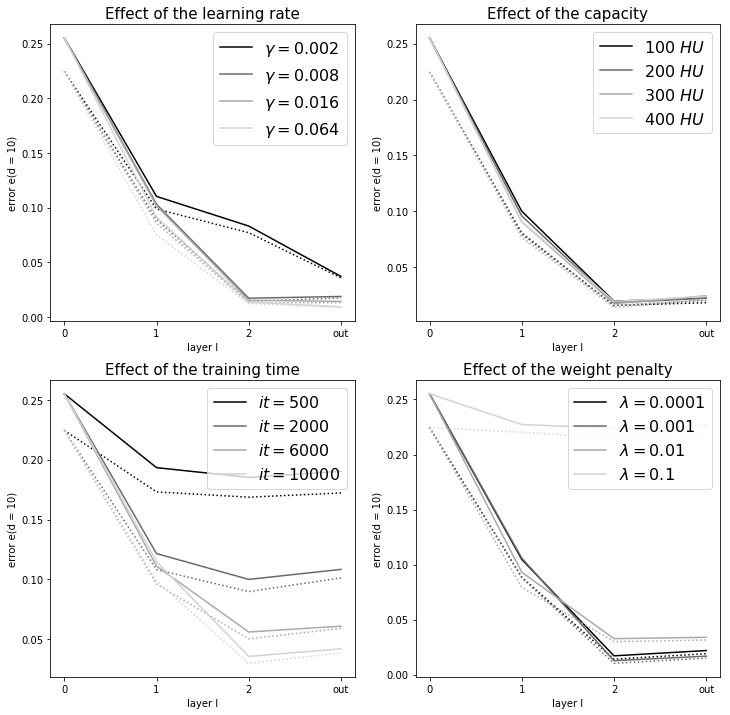

In [16]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2,2)

ax= plt.subplot(gs[0])
xaxis_title = ['0','1','2','out']
ax.set_title('Effect of the learning rate',size=15)
ax.set_xlabel('layer l')
ax.set_ylabel('error e(d = 10)')
gray_colors =  ['k','dimgray', 'darkgray', 'lightgray']
linestyles = ['-',':']

labels = ['$\\gamma=0.002$','$\\gamma=0.008$','$\\gamma=0.016$','$\\gamma=0.064$']
plt.plot(xaxis_title, first_exp['lr_up'][0,:], 
         color = gray_colors[0],linestyle=linestyles[0], label=labels[0])
plt.plot(xaxis_title, first_exp['lr_low'][0,:], 
         color = gray_colors[0],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['lr_up'][1,:], 
         color = gray_colors[1],linestyle=linestyles[0], label=labels[1])
plt.plot(xaxis_title, first_exp['lr_low'][1,:], 
         color = gray_colors[1],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['lr_up'][2,:], 
         color = gray_colors[2],linestyle=linestyles[0], label=labels[2])
plt.plot(xaxis_title, first_exp['lr_low'][2,:], 
         color = gray_colors[2],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['lr_up'][3,:], 
         color = gray_colors[3],linestyle=linestyles[0], label=labels[3])
plt.plot(xaxis_title, first_exp['lr_low'][3,:], 
         color = gray_colors[3],linestyle=linestyles[1])
plt.legend(prop={'size': 16})


ax= plt.subplot(gs[1])
xaxis_title = ['0','1','2','out']
ax.set_title('Effect of the capacity',size=15)
ax.set_xlabel('layer l')
ax.set_ylabel('error e(d = 10)')
gray_colors =  ['k','dimgray', 'darkgray', 'lightgray']
linestyles = ['-',':']

labels = ['$100\ HU$','$200\ HU$','$300\ HU$','$400\ HU$']
plt.plot(xaxis_title, first_exp['hu_up'][0,:], 
         color = gray_colors[0],linestyle=linestyles[0], label=labels[0])
plt.plot(xaxis_title, first_exp['hu_low'][0,:], 
         color = gray_colors[0],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['hu_up'][1,:], 
         color = gray_colors[1],linestyle=linestyles[0], label=labels[1])
plt.plot(xaxis_title, first_exp['hu_low'][1,:], 
         color = gray_colors[1],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['hu_up'][2,:], 
         color = gray_colors[2],linestyle=linestyles[0], label=labels[2])
plt.plot(xaxis_title, first_exp['hu_low'][2,:], 
         color = gray_colors[2],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['hu_up'][3,:], 
         color = gray_colors[3],linestyle=linestyles[0], label=labels[3])
plt.plot(xaxis_title, first_exp['hu_low'][3,:], 
         color = gray_colors[3],linestyle=linestyles[1])
plt.legend(prop={'size': 16})



ax= plt.subplot(gs[2])
xaxis_title = ['0','1','2','out']
ax.set_title('Effect of the training time',size=15)
ax.set_xlabel('layer l')
ax.set_ylabel('error e(d = 10)')
gray_colors =  ['k','dimgray', 'darkgray', 'lightgray']
linestyles = ['-',':']

labels = ['$it=500$','$it=2000$','$it=6000$','$it=10000$']
plt.plot(xaxis_title, first_exp['iter_up'][0,:], 
         color = gray_colors[0],linestyle=linestyles[0], label=labels[0])
plt.plot(xaxis_title, first_exp['iter_low'][0,:], 
         color = gray_colors[0],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['iter_up'][1,:], 
         color = gray_colors[1],linestyle=linestyles[0], label=labels[1])
plt.plot(xaxis_title, first_exp['iter_low'][1,:], 
         color = gray_colors[1],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['iter_up'][2,:], 
         color = gray_colors[2],linestyle=linestyles[0], label=labels[2])
plt.plot(xaxis_title, first_exp['iter_low'][2,:], 
         color = gray_colors[2],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['iter_up'][3,:], 
         color = gray_colors[3],linestyle=linestyles[0], label=labels[3])
plt.plot(xaxis_title, first_exp['iter_low'][3,:], 
         color = gray_colors[3],linestyle=linestyles[1])
plt.legend(prop={'size': 16})


ax= plt.subplot(gs[3])
xaxis_title = ['0','1','2','out']
ax.set_title('Effect of the weight penalty',size=15)
ax.set_xlabel('layer l')
ax.set_ylabel('error e(d = 10)')
gray_colors =  ['k','dimgray', 'darkgray', 'lightgray']
linestyles = ['-',':']

labels = ['$\\lambda=0.0001$','$\\lambda=0.001$','$\\lambda=0.01$','$\\lambda=0.1$']
plt.plot(xaxis_title, first_exp['wd_up'][0,:], 
         color = gray_colors[0],linestyle=linestyles[0], label=labels[0])
plt.plot(xaxis_title, first_exp['wd_low'][0,:], 
         color = gray_colors[0],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['wd_up'][1,:], 
         color = gray_colors[1],linestyle=linestyles[0], label=labels[1])
plt.plot(xaxis_title, first_exp['wd_low'][1,:], 
         color = gray_colors[1],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['wd_up'][2,:], 
         color = gray_colors[2],linestyle=linestyles[0], label=labels[2])
plt.plot(xaxis_title, first_exp['wd_low'][2,:], 
         color = gray_colors[2],linestyle=linestyles[1])
plt.plot(xaxis_title, first_exp['wd_up'][3,:], 
         color = gray_colors[3],linestyle=linestyles[0], label=labels[3])
plt.plot(xaxis_title, first_exp['wd_low'][3,:], 
         color = gray_colors[3],linestyle=linestyles[1])
plt.legend(prop={'size': 16},loc=1)

# CNN

In [25]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA, KernelPCA
from sklearn import linear_model

#row is layer and col is lr
hu_error_rate_upper = np.zeros((4,4))
hu_error_rate_lower = np.zeros((4,4))

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x  = Variable(batch_x)
            y = Variable(batch_y)
            
#             print(x.size(),y.size())
            a,b,out = net(x)
#             print(a.size(),b.size(),out.size())
            out.squeeze_()
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data



net = models.CNN(input_dim=1, output_dim = 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.008, momentum=0.9, weight_decay=0.001, nesterov= True)
scheduler = MultiStepLR(optimizer,[50],gamma=0.1)
if use_cuda:
    criterion.cuda()
    net.cuda()
hist= train(epoch=60,early_stopping= 20)


This is epoch:1
[========= 500/500 ======>]Step: 1ms| Tot: 1m6s|Loss: 0.279 | Acc: 91.200% (9120/10000))

This is epoch:2
[========= 500/500 ======>]Step: 1ms| Tot: 1m7s|Loss: 0.064 | Acc: 97.940% (9794/10000))

This is epoch:3
[========= 500/500 ======>]Step: 1ms| Tot: 1m7s|Loss: 0.042 | Acc: 98.710% (9871/10000))


In [26]:
ori_x= []
layer1=[]
layer2=[]
layer3=[]
true_label = []
cnn_error_rate_lower = np.zeros(4)
cnn_error_rate_upper = np.zeros(4)

for j,(batch_x, batch_y) in enumerate(test_loader):
    x  = Variable(batch_x)
    y = Variable(batch_y)
    x1,x2,x3 = net(x)

    #print(x1.size())

    ori_x.append(x.data.view(200,28*28).numpy())
    layer1.append(x1.data.view(200,100*14*14).numpy())
    layer2.append(x2.data.view(200,100*7*7).numpy())
    layer3.append(x3.data.view(200,10).numpy())
    true_label.append(y.data.numpy())


ori_x= np.concatenate(ori_x)
layer= {}

layer['layer1']=np.concatenate(layer1)
layer['layer2']=np.concatenate(layer2)
layer['layer3']=np.concatenate(layer3)
true_label =np.concatenate(true_label)

#projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
cout = 1
for lay in ['layer1','layer2','layer3']:        
    kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
    train_data = layer[lay]

    layer_kpca = kpca.fit_transform(train_data)
    logistic = linear_model.LogisticRegression()    
    logistic.fit(layer_kpca, true_label)
    error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
    print('Error rate lower bound is ', error_rat)
    cnn_error_rate_lower[cout] = error_rat

    #then compute upper bound
    kf = KFold(n_splits=2,random_state=1209)
    e_r = 0
    for train_index, test_index in kf.split(layer_kpca):
        logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
        logistic.fit(layer_kpca[train_index], true_label[train_index])
        e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
    e_r /=2
    cnn_error_rate_upper[cout] = e_r
    print('Error rate upper bound is ', e_r)
    cout+=1


print('Finish this round')


Error rate lower bound is  0.213
Error rate upper bound is  0.2265
Error rate lower bound is  0.1514
Error rate upper bound is  0.1722
Error rate lower bound is  0.016
Error rate upper bound is  0.0175
Finish this round


In [29]:
cnn_error_rate_upper[0]= 0.2552
cnn_error_rate_lower[0]= 0.2246

In [37]:
second_exp = {}
second_exp['cnn_up']=cnn_error_rate_upper
second_exp['cnn_low']= cnn_error_rate_lower
second_exp['mlp_d']= mlp_error_rate_d
#mlp_error_rate_d# = mlp_error_rate_d[:,:10]

In [38]:
with open('second_exp.pkl', 'wb') as f:
    pickle.dump(second_exp,f)

In [21]:
ori_x[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [24]:
first_exp

{'hu_low': array([[ 0.2246,  0.08  ,  0.0158,  0.0182],
        [ 0.2246,  0.0811,  0.0156,  0.0203],
        [ 0.2246,  0.0773,  0.0139,  0.0208],
        [ 0.2246,  0.0755,  0.0159,  0.0214]]),
 'hu_up': array([[ 0.2552,  0.1001,  0.0196,  0.0223],
        [ 0.2552,  0.0959,  0.0181,  0.0223],
        [ 0.2552,  0.0907,  0.0174,  0.0244],
        [ 0.2552,  0.0908,  0.0194,  0.0238]]),
 'iter_low': array([[ 0.2246,  0.1731,  0.1687,  0.1722],
        [ 0.2246,  0.1081,  0.0897,  0.1012],
        [ 0.2246,  0.096 ,  0.0502,  0.0589],
        [ 0.2246,  0.0985,  0.0297,  0.0384]]),
 'iter_up': array([[ 0.2552,  0.1934,  0.1852,  0.1904],
        [ 0.2552,  0.1215,  0.0999,  0.1083],
        [ 0.2552,  0.111 ,  0.0559,  0.0608],
        [ 0.2552,  0.1148,  0.0355,  0.0418]]),
 'lr_low': array([[ 0.2246,  0.0988,  0.0771,  0.0358],
        [ 0.2246,  0.0892,  0.0145,  0.0174],
        [ 0.2246,  0.0858,  0.013 ,  0.0131],
        [ 0.2246,  0.0751,  0.0122,  0.0087]]),
 'lr_up': array([[

In [33]:
error_rate = {}

#row is layer and col is lr
mlp_error_rate_d = np.zeros((3,11))


def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    counter=0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            counter+=1
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data




net = models.MLP(input_dim=28*28, output_dim = 10,hu=1600)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.008, momentum=0.9, weight_decay=0.001, nesterov= True)
scheduler = MultiStepLR(optimizer,[50],gamma=0.1)
if use_cuda:
    criterion.cuda()
    net.cuda()
hist= train(epoch=60,early_stopping= 20)
ori_x= []
layer1=[]
layer2=[]
layer3=[]
true_label = []

for j,(batch_x, batch_y) in enumerate(test_loader):
    x = Variable(batch_x.view(200, 28*28))
    y = Variable(batch_y)
    x1,x2,x3 = net(x)

    ori_x.append(x.data.view(200,28*28).numpy())
    layer1.append(x1.data.view(200,1600).numpy())
    layer2.append(x2.data.view(200,1600).numpy())
    layer3.append(x3.data.view(200,10).numpy())
    true_label.append(y.data.numpy())


ori_x= np.concatenate(ori_x)
layer= {}

layer['layer1']=np.concatenate(layer1)
layer['layer2']=np.concatenate(layer2)
layer['layer3']=np.concatenate(layer3)
layer['ori_x'] = ori_x

true_label =np.concatenate(true_label)

        
for d in range(1,11):
    loc = d-1    
    #projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
    num = 0
    for lay in ['ori_x','layer1','layer2']:        
        kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=d)
        train_data = layer[lay]
        
        layer_kpca = kpca.fit_transform(train_data)
        logistic = linear_model.LogisticRegression()    
        logistic.fit(layer_kpca, true_label)
        error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
        print('Error rate lower bound is ', error_rat)
        mlp_error_rate_d[num, loc] = error_rat
        
        #then compute upper bound
        kf = KFold(n_splits=2,random_state=1209)
        e_r = 0
        for train_index, test_index in kf.split(layer_kpca):
            logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
            logistic.fit(layer_kpca[train_index], true_label[train_index])
            e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
        e_r /=2
        mlp_error_rate_d[num, loc] = e_r
        print('Error rate upper bound is ', e_r)
        num+=1
        

    print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 8s6ms|Loss: 0.674 | Acc: 80.770% (8077/10000)

This is epoch:2
[========= 500/500 ======>]Step: 0ms| Tot: 8s3ms|Loss: 0.253 | Acc: 92.680% (9268/10000)

This is epoch:3
[========= 500/500 ======>]Step: 0ms| Tot: 9s1ms|Loss: 0.179 | Acc: 94.580% (9458/10000)

This is epoch:4
[========= 500/500 ======>]Step: 0ms| Tot: 8s8ms|Loss: 0.125 | Acc: 96.460% (9646/10000)

This is epoch:5
[========= 500/500 ======>]Step: 0ms| Tot: 8s4ms|Loss: 0.094 | Acc: 97.330% (9733/10000)

This is epoch:6
[========= 500/500 ======>]Step: 0ms| Tot: 8s8ms|Loss: 0.071 | Acc: 98.080% (9808/10000)
Error rate lower bound is  0.708
Error rate upper bound is  0.7206
Error rate lower bound is  0.663
Error rate upper bound is  0.6598
Error rate lower bound is  0.6781
Error rate upper bound is  0.6752
Finish this round
Error rate lower bound is  0.5733
Error rate upper bound is  0.5984
Error rate lower bound is  0.4863
Error rate upper bound is  0.4931
Error ra

In [26]:
#DBN
import DBN

dbn = DBN.DBN(n_visible=28*28, n_hidden=[1600,1600,10])

binary_ori_x= ori_x.copy()
binary_ori_x[binary_ori_x>0]=1

In [31]:
DBN.greedy_train(dbn,input_data=torch.from_numpy(binary_ori_x), lr= [1e-3,1e-3,1e-3],epoch=[50,50,50],weight_decay=[0,0,0],L1_penalty=[0,0,0])

Training the 0th layer
Training the 1th layer
Training the 2th layer


In [70]:
##binary_ori_x[1]
dbn.bias_gen[0].size()
net = models.MLP(input_dim=28*28, output_dim=10)

net.layer1.weight = dbn.rbm_layers[0].W
net.layer2.weight = dbn.rbm_layers[1].W
net.layer3.weight = dbn.rbm_layers[2].W

net.layer1.bias= dbn.rbm_layers[0].h_bias
net.layer2.bias= dbn.rbm_layers[1].h_bias
net.layer3.bias= dbn.rbm_layers[2].h_bias

In [64]:
net = models.MLP2(input_dim=28*28, output_dim=10)
net.layer1.weight = dbn.rbm_layers[0].W
#net.layer1.bias= dbn.rbm_layers[0].v_bias
net.layer1(x)

Variable containing:
-7.8367e-01 -3.7878e+00  2.6456e+00  ...   3.2378e+00  6.0715e-01 -4.6696e+00
-4.0139e+00 -4.6898e+00  2.9894e+00  ...   4.3854e+00  4.7983e-01 -2.9811e+00
-7.2285e-01 -5.1297e-01  4.7148e-01  ...   1.4914e+00  3.4251e+00  6.8571e-01
                ...                   ⋱                   ...                
 1.6892e+00  4.9279e-02  1.9217e+00  ...   3.6629e+00  2.6906e+00  1.1780e+00
-1.5083e+00 -5.5227e-01  1.2851e+00  ...   2.7731e+00  2.2933e+00  7.1392e-01
-5.0177e+00 -5.8466e-01  3.3121e+00  ...   4.1215e+00  1.7216e-01 -3.0612e+00
[torch.FloatTensor of size 200x1600]

In [65]:
net = models.MLP2(input_dim=28*28, output_dim=10)
#net.layer2.bias
dbn.rbm_layers[0].v_bias

Parameter containing:
-0.0402
-0.0427
-0.0563
-0.0431
-0.0301
-0.0339
-0.0301
-0.0451
-0.0315
-0.0461
-0.0316
-0.0372
-0.0524
-0.0308
-0.0562
-0.0574
-0.0298
-0.0417
-0.0475
-0.0423
-0.0515
-0.0396
-0.0308
-0.0400
-0.0495
-0.0335
-0.0350
-0.0619
-0.0347
-0.0543
-0.0552
-0.0307
-0.0603
-0.0343
-0.0508
-0.0600
-0.0325
-0.0354
-0.0390
-0.0485
-0.0429
-0.0365
-0.0489
-0.0388
-0.0363
-0.0324
-0.0330
-0.0266
-0.0417
-0.0342
-0.0472
-0.0607
-0.0360
-0.0284
-0.0441
-0.0472
-0.0368
-0.0369
-0.0452
-0.0423
-0.0323
-0.0311
-0.0347
-0.0285
-0.0293
-0.0282
-0.0316
-0.0420
-0.0408
-0.0367
-0.0433
-0.0444
-0.0354
-0.0388
-0.0318
-0.0260
-0.0256
-0.0288
-0.0249
-0.0273
-0.0511
-0.0383
-0.0332
-0.0367
-0.0348
-0.0464
-0.0532
-0.0383
-0.0441
-0.0364
-0.0232
-0.0133
-0.0170
-0.0153
-0.0150
-0.0230
-0.0202
-0.0098
-0.0145
-0.0132
-0.0222
-0.0163
-0.0130
-0.0244
-0.0188
-0.0121
-0.0173
-0.0233
-0.0317
-0.0267
-0.0473
-0.0323
-0.0411
-0.0588
-0.0379
-0.0303
-0.0266
-0.0213
-0.0172
-0.0054
-0.0009
 0.0016
 0

In [74]:

PMLP_error_rate = np.zeros((2,4))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.008, momentum=0.9, weight_decay=0.001, nesterov= True)
scheduler = MultiStepLR(optimizer,[50],gamma=0.1)
if use_cuda:
    criterion.cuda()
    net.cuda()
hist= train(epoch=60,early_stopping= 20)
ori_x= []
layer1=[]
layer2=[]
layer3=[]
true_label = []

for j,(batch_x, batch_y) in enumerate(test_loader):
    x = Variable(batch_x.view(200, 28*28))
    y = Variable(batch_y)
    x1,x2,x3 = net(x)

    ori_x.append(x.data.view(200,28*28).numpy())
    layer1.append(x1.data.view(200,1600).numpy())
    layer2.append(x2.data.view(200,1600).numpy())
    layer3.append(x3.data.view(200,10).numpy())
    true_label.append(y.data.numpy())


ori_x= np.concatenate(ori_x)
layer= {}

layer['layer1']=np.concatenate(layer1)
layer['layer2']=np.concatenate(layer2)
layer['layer3']=np.concatenate(layer3)
true_label =np.concatenate(true_label)

#projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
cout = 1
for lay in ['layer1','layer2','layer3']:        
    kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
    train_data = layer[lay]

    layer_kpca = kpca.fit_transform(train_data)
    logistic = linear_model.LogisticRegression()    
    logistic.fit(layer_kpca, true_label)
    error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
    print('Error rate lower bound is ', error_rat)
    PMLP_error_rate[0, cout] = error_rat

    #then compute upper bound
    kf = KFold(n_splits=2,random_state=1209)
    e_r = 0
    for train_index, test_index in kf.split(layer_kpca):
        logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
        logistic.fit(layer_kpca[train_index], true_label[train_index])
        e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
    e_r /=2
    PMLP_error_rate[1,cout] = e_r
    print('Error rate upper bound is ', e_r)
    cout+=1


print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 8s5ms|Loss: 0.018 | Acc: 99.570% (9957/10000)
Error rate lower bound is  0.1235
Error rate upper bound is  0.1462
Error rate lower bound is  0.0426
Error rate upper bound is  0.0528
Error rate lower bound is  0.0186
Error rate upper bound is  0.0203
Finish this round


In [4]:
import pickle
with open('second_exp.pkl', 'rb') as f:
    second_exp = pickle.load(f)
    
# with open('second_exp.pkl', 'wb') as f:
#     pickle.dump(second_exp,f)

In [73]:
second_exp

{'cnn_low': array([ 0.2246,  0.213 ,  0.1514,  0.016 ]),
 'cnn_up': array([ 0.2552,  0.2265,  0.1722,  0.0175]),
 'mlp_d': array([[ 0.7206,  0.5984,  0.5237,  0.4697,  0.3767,  0.3225,  0.298 ,
          0.2716,  0.2605,  0.2552],
        [ 0.6598,  0.4931,  0.3158,  0.2633,  0.1944,  0.154 ,  0.1253,
          0.1189,  0.1141,  0.102 ],
        [ 0.6752,  0.4182,  0.2133,  0.1219,  0.0746,  0.0482,  0.0386,
          0.0364,  0.0215,  0.0184]])}

In [77]:
PMLP_error_rate[0,0] = 0.2246
PMLP_error_rate[1,0] = 0.2552

In [78]:
second_exp['PMLP'] = PMLP_error_rate

In [79]:
first_exp

{'hu_low': array([[ 0.2246,  0.08  ,  0.0158,  0.0182],
        [ 0.2246,  0.0811,  0.0156,  0.0203],
        [ 0.2246,  0.0773,  0.0139,  0.0208],
        [ 0.2246,  0.0755,  0.0159,  0.0214]]),
 'hu_up': array([[ 0.2552,  0.1001,  0.0196,  0.0223],
        [ 0.2552,  0.0959,  0.0181,  0.0223],
        [ 0.2552,  0.0907,  0.0174,  0.0244],
        [ 0.2552,  0.0908,  0.0194,  0.0238]]),
 'iter_low': array([[ 0.2246,  0.1731,  0.1687,  0.1722],
        [ 0.2246,  0.1081,  0.0897,  0.1012],
        [ 0.2246,  0.096 ,  0.0502,  0.0589],
        [ 0.2246,  0.0985,  0.0297,  0.0384]]),
 'iter_up': array([[ 0.2552,  0.1934,  0.1852,  0.1904],
        [ 0.2552,  0.1215,  0.0999,  0.1083],
        [ 0.2552,  0.111 ,  0.0559,  0.0608],
        [ 0.2552,  0.1148,  0.0355,  0.0418]]),
 'lr_low': array([[ 0.2246,  0.0988,  0.0771,  0.0358],
        [ 0.2246,  0.0892,  0.0145,  0.0174],
        [ 0.2246,  0.0858,  0.013 ,  0.0131],
        [ 0.2246,  0.0751,  0.0122,  0.0087]]),
 'lr_up': array([[

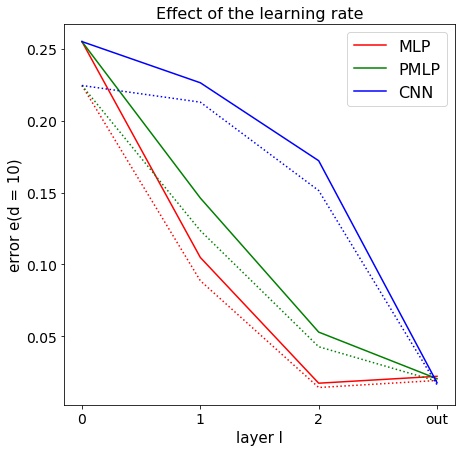

In [93]:
fig = plt.figure(figsize=(7,7))
#gs = gridspec.GridSpec(2,2)

ax= plt.subplot()
xaxis_title = ['0','1','2','out']
ax.set_title('Effect of the learning rate',size=16)
ax.set_xlabel('layer l',size=15)
ax.set_ylabel('error e(d = 10)',size=15)
#ax.set_xticks(size=10)
ax.tick_params(axis = 'both', labelsize=14)
gray_colors =  ['k','dimgray', 'darkgray', 'lightgray']
linestyles = ['-',':']

labels = ['MLP','PMLP','CNN']
plt.plot(xaxis_title, first_exp['wd_up'][0,:], 
         color = 'red',linestyle=linestyles[0], label=labels[0])
plt.plot(xaxis_title, first_exp['wd_low'][0,:], 
         color = 'red',linestyle=linestyles[1], label=labels[0])
plt.plot(xaxis_title, second_exp['PMLP'][1,:], 
         color = 'green',linestyle=linestyles[0], label=labels[1])
plt.plot(xaxis_title, second_exp['PMLP'][0,:], 
         color = 'green',linestyle=linestyles[1],label=labels[1])
plt.plot(xaxis_title, second_exp['cnn_up'], 
         color = 'blue',linestyle=linestyles[0], label=labels[2])
plt.plot(xaxis_title, second_exp['cnn_low'], 
         color = 'blue',linestyle=linestyles[1], label=labels[2])
plt.legend(prop={'size': 16})

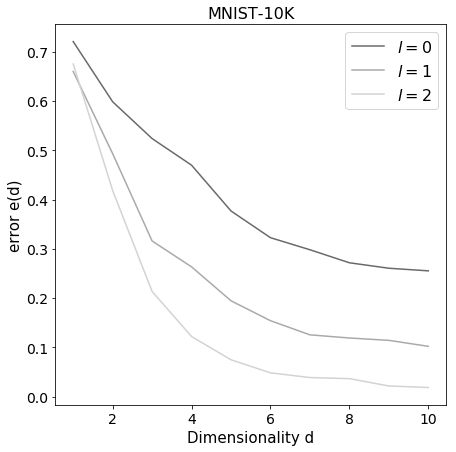

In [5]:
fig = plt.figure(figsize=(7,7))
#gs = gridspec.GridSpec(2,2)

ax= plt.subplot()
#xaxis_title = [str(i) for i in range(1,11)]
xaxis_title = [i for i in range(1,11)]
ax.set_title('MNIST-10K',size=16)
ax.set_xlabel('Dimensionality d',size=15)
ax.set_ylabel('error e(d)',size=15)
#ax.set_xticks(size=10)
ax.tick_params(axis = 'both', labelsize=14)
gray_colors =  ['k','dimgray', 'darkgray', 'lightgray']
linestyles = ['-',':']

labels = ['$l=0$','$l=1$','$l=2$']

plt.plot(xaxis_title, second_exp['mlp_d'][0,:], 
         color = gray_colors[1],linestyle=linestyles[0], label=labels[0])
plt.plot(xaxis_title, second_exp['mlp_d'][1,:], 
         color = gray_colors[2],linestyle=linestyles[0], label=labels[1])
plt.plot(xaxis_title, second_exp['mlp_d'][2,:], 
         color = gray_colors[3],linestyle=linestyles[0], label=labels[2])

plt.legend(prop={'size': 16})